<a href="https://colab.research.google.com/github/darthVarada/data_analytics/blob/main/modeling_pratico_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import datasets

# 1. Understanding the data

In [2]:
housing = datasets.fetch_california_housing()

In [3]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
#CARACTERISTICAS DAS CASAS
X = housing.data

# PREÇO CONHECIDO DAS CASAS - TARGET
y = housing.target

In [9]:
y_visualize = y
y_visualize.dtype

dtype('float64')

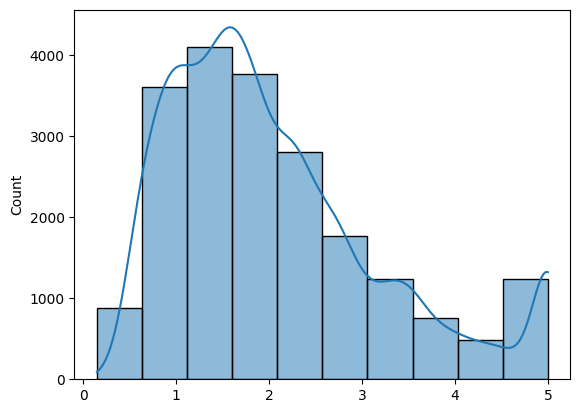

In [10]:
sns.histplot(y_visualize, bins=10, kde=True)
plt.show()

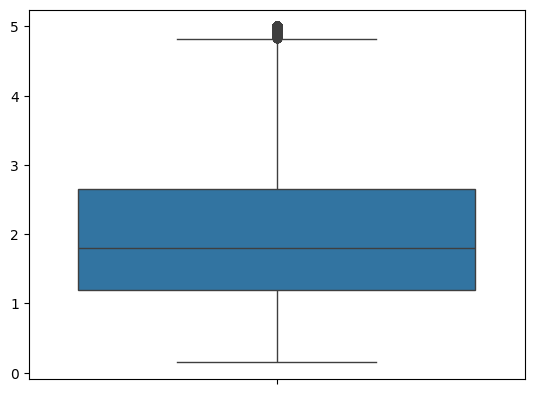

In [11]:
sns.boxplot(y_visualize)
plt.show()

# 2. Modeling techniques

## 2.0 TEST DESIGN
Data set Split
Standard Train/Test dataset split with 20% of the sample for testing using SKLEARN.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## 2.1 Linear Regression with SKLEARN
<https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model>

In [13]:
regLinear = LinearRegression().fit(X_train, y_train)

### 2.1.1 evaluation model
Methods:
MSE,
RMSE


In [14]:
y_pred_linear = regLinear.predict(X_test)

In [15]:
MSE_LRSK = mean_squared_error(y_test, y_pred_linear)

In [16]:
print("MSE:",MSE_LRSK)
print("RMSE:",np.sqrt(MSE_LRSK))

MSE: 0.5304858998933897
RMSE: 0.7283446298926008


## 2.2 Support Vector Regression from SKLEARN
<https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm>

In [17]:
regSVR = SVR().fit(X_train, y_train)

### 2.2.1 evaluation model

In [18]:
y_pred_SVR = regSVR.predict(X_test)

In [19]:
print(y_pred_SVR)

[1.74615728 1.77188847 1.87535166 ... 1.56450213 1.8183677  1.82813713]


In [20]:
MSE_SVR = mean_squared_error(y_test, y_pred_SVR)

In [21]:
print("MSE SVR:", MSE_SVR)
print("RMSE SVR:", np.sqrt(MSE_SVR))

MSE SVR: 1.3487605400204776
RMSE SVR: 1.1613615027287918


## 2.3 Decision Tree Regression from GXBoost
<https://xgboost.readthedocs.io/en/stable/parameter.html>


In [22]:
regXGB = XGBRegressor().fit(X_train, y_train)

### 2.3.1 evaluation model

In [23]:
y_pred_XGB = regXGB.predict(X_test)

In [24]:
MSE_XGB = mean_squared_error(y_test, y_pred_XGB)

In [25]:
print("MSE XGB:", MSE_XGB)
print("RMSE XGB:", np.sqrt(MSE_XGB))

MSE XGB: 0.21686028891090103
RMSE XGB: 0.46568260533425665


# 3. Otimizando Hiperparametros
ultilizando GridSearchCV do sklearn

In [26]:
regXGB.get_params().keys()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [41]:
parameters = {
    "max_depth": [5, 6, 7],
    "learning_rate": [0.1, 0.2, 0.3],
    "objective": ['reg:squarederror'],
    "booster": ['gbtree'],
    "n_jobs": [5],
    "gamma": [0, 1],
    "min_child_weight": [1, 3],
    "max_delta_step": [0, 1],
    "subsample": [0.5, 1]
}

In [38]:
xgbGrid = GridSearchCV(XGBRegressor(), parameters, refit= 'neg_mean_square_error', verbose=True)

In [39]:
xgbGridModel = xgbGrid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [40]:
xgbGridModel.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.2,
 'max_delta_step': 1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_jobs': 5,
 'objective': 'reg:squarederror',
 'subsample': 1}

In [42]:
yGrid = xgbGridModel.predict(X_test)

In [43]:
MSEGrid = mean_squared_error(y_test, yGrid)

In [44]:
print(f"MSE XGB Grid {MSEGrid}")
print(f"RMSE XBG Grid {np.sqrt(MSEGrid)}")

MSE XGB Grid 0.21238468919847678
RMSE XBG Grid 0.46085213376795464
